# Iris 품종 분류하기

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(dir(iris))
print(type(dir(iris)))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
<class 'list'>


In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_data = iris.data
print(iris_data.shape)
#shape는 배열의 형상정보를 출력

(150, 4)


In [4]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# DESCR 에는 데이터셋의 설명이 담겨있다.
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.filename

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [10]:
import pandas as pd
print(pd.__version__)

1.1.3


In [11]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# 이 trainig dataset과 test dataset을 간단히 분리 train 80 test 20으로 셋팅
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)


print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [14]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [15]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [16]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

## Decision Tree
- 의사결정트리 ratsgo님의 블로그 https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

In [17]:
'''
Decision Tree 는 직관적이면서도 간단하게 사용할 수 있어 분류 문제를 풀 때 가장 기본적으
로 쓰이는 모델 중 하나
'''

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)

print(decision_tree._estimator_type)

classifier


In [18]:
# 학습하는 메서드
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [19]:
# test 데이터로 예측 predict()
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [20]:
# y_test로 확인
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [21]:
# 정확도(Accuracy)
# 정확도 = 예측결과가정답인데이터의개수 / 예측한전체데이터의개수
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9

In [22]:
# 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [23]:
# 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target


In [24]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)


In [25]:
# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## Random Forest
- 군중은 똑똑하다 -- Random Forest https://medium.com/@deepvalidation/title-3b0e263605de

In [26]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=25)
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Support Vector Machine (SVM)
- Support Vector Machine (SVM, 서포트 벡터 머신) https://excelsior-cjh.tistory.com/66?category=918734

In [27]:
from sklearn import svm
svm_model = svm.SVC()
print(svm_model._estimator_type)

classifier


In [28]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Stochastic Gradient Descent Classifier (SGDClassifier)
- 사이킷런 공식 문서 Stochastic Gradient Descent Classifier (SGDClassifier) : https://scikit-learn.org/stable/modules/sgd.html


- Gradient Descent(경사하강법) 와 SGD( Stochastic Gradient Descent) 확률적 경사하강법 : https://everyday-deeplearning.tistory.com/entry/SGD-Stochastic-Gradient-Descent-%ED%99%95%EB%A5%A0%EC%A0%81-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95


- 손실 줄이기: 확률적 경사하강법 : https://developers.google.com/machine-learning/crash-course/reducing-loss/stochastic-gradient-descent?hl=ko
  

In [29]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

classifier


In [30]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.31      0.47        13
           2       0.67      1.00      0.80         8

    accuracy                           0.70        30
   macro avg       0.77      0.77      0.68        30
weighted avg       0.80      0.70      0.65        30



## Logistic Regression
- 로지스틱회귀(Logistic Regression) 쉽게 이해하기 : http://hleecaster.com/ml-logistic-regression-concept/

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear')
print(logistic_model._estimator_type)

classifier


- logistic_model = LogisticRegression(solver='liblinear')
solver='liblinear'를 추가 하지 않으면
str' object has no attribute 'decode' 에러 발생
- 참조 사이트 : https://www.coder.work/article/7535477

In [32]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.77      0.87        13
           2       0.73      1.00      0.84         8

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



# 다양하게 평가해보기 (1) 정확도에는 함정이 있다

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [34]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [35]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

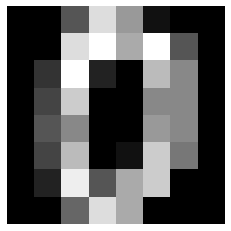

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

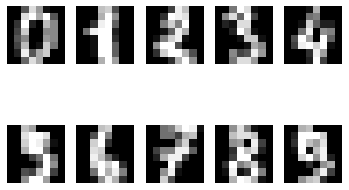

In [38]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [39]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,new_label,
                                                    test_size=0.2,
                                                    random_state=15)
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

In [42]:
fake_pred = [0] * len(y_pred)
accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

## 다양하게 평가해보기 (2) 정답과 오답에도 종류가 있다

- 정답과 오답을 구분하여 표현하는 방법을 오차행렬(confusion matrix) 이라고 합니다.
- 오차행렬 설명 : https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html
- 분류성능평가지표 : https://sumniya.tistory.com/26

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]], dtype=int64)

In [44]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [46]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

# 프로젝트
## (1) 손글씨 분류 
## (2) 와인 분류 
## (3)breast cancer 분류


## 손글씨를 분류해 봅시다

In [58]:
# 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [59]:
# 데이터 준비
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

In [60]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [61]:
# target_names 출력
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
import pandas as pd
print(pd.__version__)
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)

digits_df.describe()

1.1.3


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [63]:

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=7)

In [64]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier



# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [65]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 학습 및 예측
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [66]:
# Support Vector Machine (SVM)
from sklearn import svm

# 모델 학습 및 예측
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [67]:
# Stochastic Gradient Descent Classifier (SGDClassifier)
from sklearn.linear_model import SGDClassifier

# 모델 학습 및 예측
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.88      0.90      0.89        42
           2       0.98      1.00      0.99        40
           3       1.00      0.85      0.92        34
           4       0.97      0.97      0.97        37
           5       0.78      1.00      0.88        28
           6       0.93      0.93      0.93        28
           7       0.97      0.97      0.97        33
           8       0.95      0.84      0.89        43
           9       0.91      0.94      0.92        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.93       360
weighted avg       0.94      0.94      0.94       360



In [68]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# 모델 학습 및 예측
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      0.90      0.90        42
           2       0.97      0.97      0.97        40
           3       0.86      0.94      0.90        34
           4       0.97      0.97      0.97        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.93      0.88      0.90        43
           9       0.93      0.88      0.90        32

    accuracy                           0.94       360
   macro avg       0.94      0.95      0.94       360
weighted avg       0.95      0.94      0.94       360



##  load_wine : 와인을 분류해 봅시다

In [70]:
# 필요한 모듈 import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [71]:
# 데이터 준비
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [72]:
# 데이터 준비
wine_data = wine.data
wine_label = wine.target

In [73]:
# target_names 출력
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [74]:
import pandas as pd
print(pd.__version__)
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)

wine_df.describe()

1.1.3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [75]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=7)

In [76]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier



# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [77]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 학습 및 예측
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [78]:
# Support Vector Machine (SVM)
from sklearn import svm

# 모델 학습 및 예측
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



In [79]:
# Stochastic Gradient Descent Classifier (SGDClassifier)
from sklearn.linear_model import SGDClassifier

# 모델 학습 및 예측
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.71      0.88      0.79        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.39      0.63      0.48        36
weighted avg       0.43      0.61      0.50        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# 모델 학습 및 예측
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



## load_breast_cancer : 유방암 여부를 진단해 봅시다

In [81]:
# 필요한 모듈 import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [82]:
# 데이터 준비
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [83]:
# 데이터 준비
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [84]:
# target_names 출력
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [85]:
import pandas as pd
print(pd.__version__)
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)

breast_cancer_df.describe()

1.1.3


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [86]:
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data,
                                                    breast_cancer_label,
                                                    test_size=0.2,
                                                    random_state=7)

In [87]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier



# 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [88]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 학습 및 예측
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [89]:
# Support Vector Machine (SVM)
from sklearn import svm

# 모델 학습 및 예측
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [90]:
# Stochastic Gradient Descent Classifier (SGDClassifier)
from sklearn.linear_model import SGDClassifier

# 모델 학습 및 예측
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        40
           1       0.97      0.77      0.86        74

    accuracy                           0.83       114
   macro avg       0.83      0.86      0.83       114
weighted avg       0.87      0.83      0.84       114



In [91]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# 모델 학습 및 예측
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

